In [2]:
%load_ext autoreload
%autoreload 2
from pylat import read_and_write
from pylat import polyakov
from pylat import utility
from pylat import fourier_surface
from pylat import global_variables
import os
import glob

In [14]:
#folders = utility.list_all_folders(global_variables.data_path_surface_abs,"su4")
folders = utility.list_all_folders(global_variables.data_path_surface_z_smear,"su4")


../data/output-measure-surface-z-smear/su4-40-40-60-6/beta-10.8-twist-1 , index: 0
../data/output-measure-surface-z-smear/su4-40-40-60-6/beta-10.8-twist-2 , index: 1
../data/output-measure-surface-z-smear/su4-60-60-80-6/beta-10.797-twist-1 , index: 2
../data/output-measure-surface-z-smear/su4-60-60-80-6/beta-10.797-twist-2 , index: 3
../data/output-measure-surface-z-smear/su4-80-80-120-6/beta-10.8-twist-1-05-03-25 , index: 4
../data/output-measure-surface-z-smear/su4-80-80-120-6/beta-10.8-twist-1-06-03-25 , index: 5
../data/output-measure-surface-z-smear/su4-80-80-120-6/beta-10.8-twist-1-full , index: 6
../data/output-measure-surface-z-smear/su4-80-80-120-6/beta-10.8-twist-1-short , index: 7
../data/output-measure-surface-z-smear/su4-80-80-120-6/beta-10.8-twist-2-05-03-25 , index: 8
../data/output-measure-surface-z-smear/su4-80-80-120-6/beta-10.8-twist-2-06-03-25 , index: 9
../data/output-measure-surface-z-smear/su4-80-80-120-6/beta-10.8-twist-2-full , index: 10
../data/output-measure-

## Load data

In [3]:

smooth_surfaces= {}
#choose_folder = 2
#folder = folders[choose_folder]
folder = "/home/haaaaron/suN-gauge-twist-surface"
files = glob.glob(os.path.join(folder, "surface_smooth_*"))
print(files)
for file in files:
    file_name = file.split("/")[-1]
    smearing_level = file_name.split("_")[2] + "_" + file_name.split("_")[3]
    print(smearing_level)
    volume, surface = read_and_write.read_surface_data(folder, file_name)
    smooth_surfaces[smearing_level] = surface
#utility.display_markdown_title(folder)
print(len(smooth_surfaces[list(smooth_surfaces.keys())[0]]))

['/home/haaaaron/suN-gauge-twist-surface/surface_smooth_80_80', '/home/haaaaron/suN-gauge-twist-surface/surface_smooth_30_30', '/home/haaaaron/suN-gauge-twist-surface/surface_smooth_10_10', '/home/haaaaron/suN-gauge-twist-surface/surface_smooth_50_50', '/home/haaaaron/suN-gauge-twist-surface/surface_smooth_5_5', '/home/haaaaron/suN-gauge-twist-surface/surface_smooth_20_20', '/home/haaaaron/suN-gauge-twist-surface/surface_smooth_70_70', '/home/haaaaron/suN-gauge-twist-surface/surface_smooth_60_60', '/home/haaaaron/suN-gauge-twist-surface/surface_smooth_40_40']
80_80
Constructing surface array
30_30
Constructing surface array
10_10
Constructing surface array
50_50
Constructing surface array
5_5
Constructing surface array
20_20
Constructing surface array
70_70
Constructing surface array
60_60
Constructing surface array
40_40
Constructing surface array
1000


dict_keys(['80_80', '30_30', '10_10', '50_50', '5_5', '20_20', '70_70', '60_60', '40_40'])


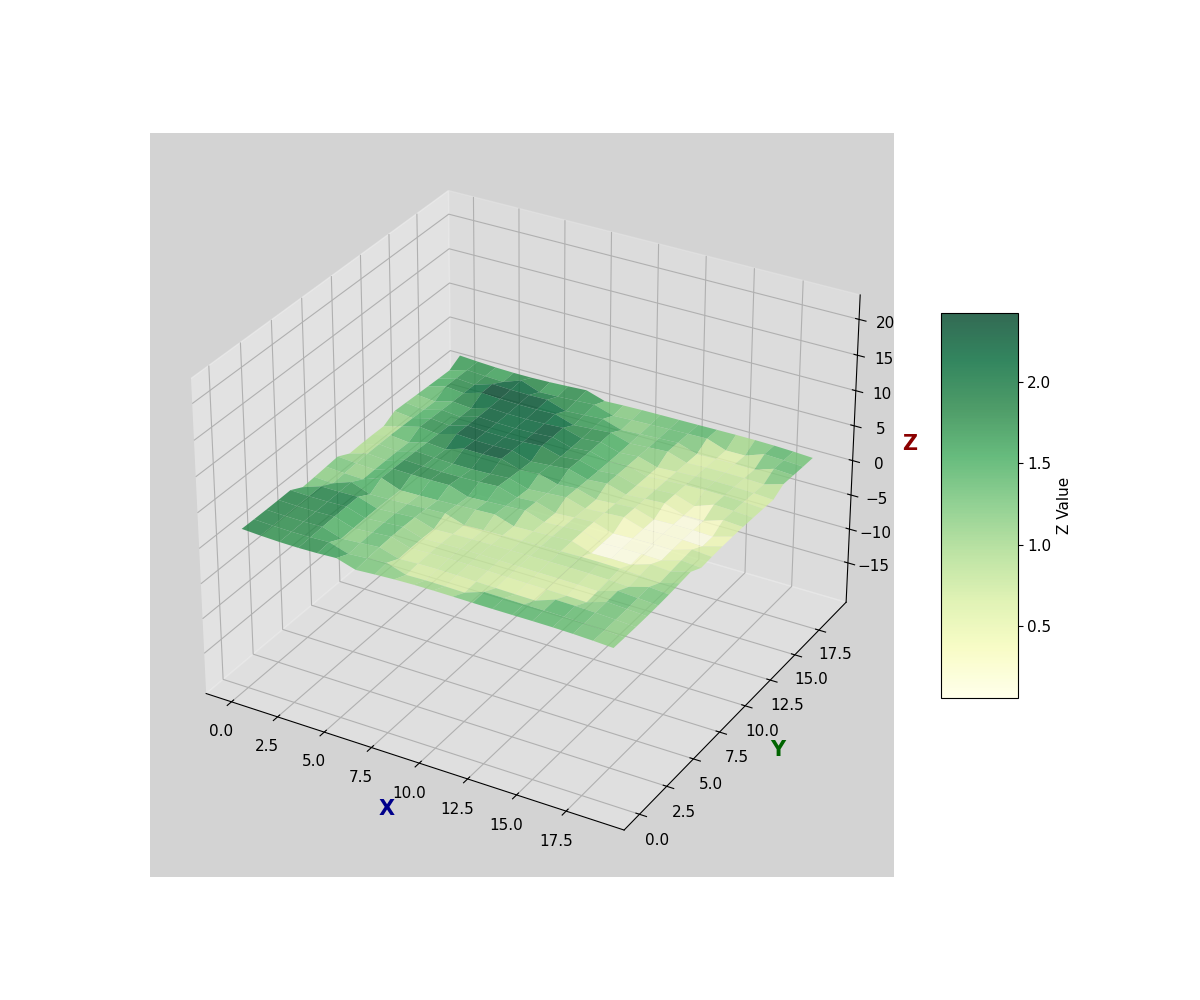

2.49467 0.00386363


In [4]:
%matplotlib widget
smearing_level = "30_30"
print(smooth_surfaces.keys())
index = 98 # addded thermalization
#fourier_surface.surface_in_3d(smooth_surfaces[smearing_level][index],artistic=False,extra=(smooth_surfaces[smearing_level][index-400],smooth_surfaces[smearing_level][index-800]))
fourier_surface.surface_in_3d(smooth_surfaces[smearing_level][index],artistic=False)

print(smooth_surfaces[smearing_level][index][:,2].max(),smooth_surfaces[smearing_level][index][:,2].min())

In [35]:
import numpy as np
for smearing_level, surfaces in smooth_surfaces.items():
    print(surfaces)

[[[ 0.        0.        0.656276]
  [ 1.        0.        0.647669]
  [ 2.        0.        0.633097]
  ...
  [29.       31.        0.580285]
  [30.       31.        0.587859]
  [31.       31.        0.587003]]

 [[ 0.        0.        0.82434 ]
  [ 1.        0.        0.838165]
  [ 2.        0.        0.790821]
  ...
  [29.       31.        0.554627]
  [30.       31.        0.604288]
  [31.       31.        0.634357]]

 [[ 0.        0.        0.545348]
  [ 1.        0.        0.781369]
  [ 2.        0.        0.948672]
  ...
  [29.       31.        0.161565]
  [30.       31.        0.171989]
  [31.       31.        0.266653]]

 ...

 [[ 0.        0.       15.0737  ]
  [ 1.        0.       16.193   ]
  [ 2.        0.       17.2346  ]
  ...
  [29.       31.       13.5407  ]
  [30.       31.       13.5731  ]
  [31.       31.       13.9314  ]]

 [[ 0.        0.       15.3117  ]
  [ 1.        0.       15.5442  ]
  [ 2.        0.       15.8771  ]
  ...
  [29.       31.       15.3919  ]
  [3

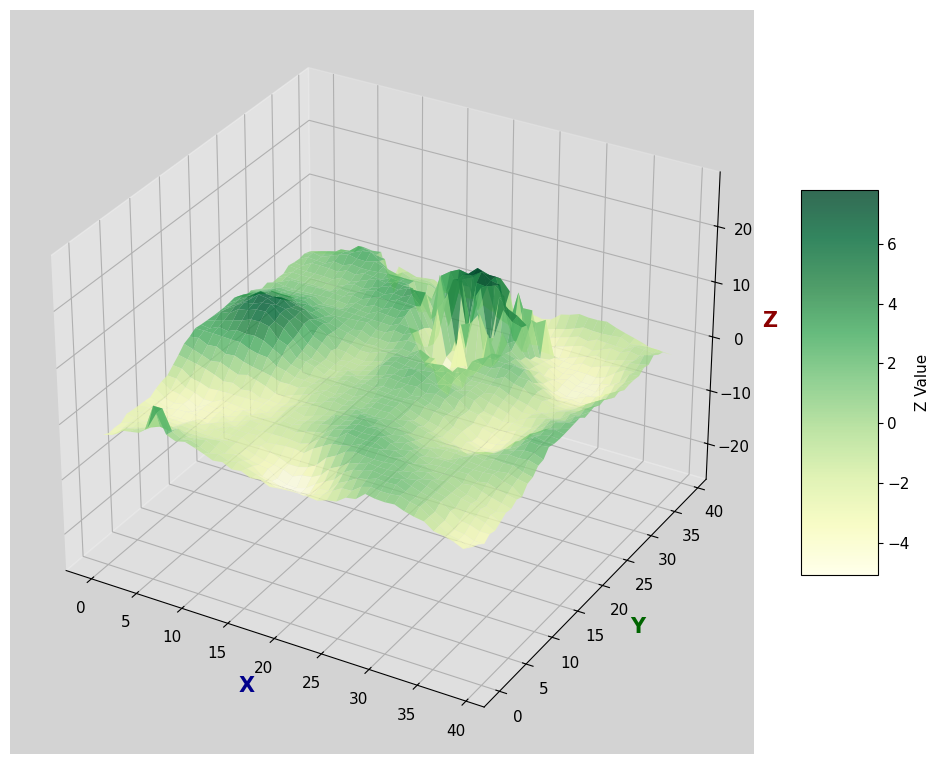

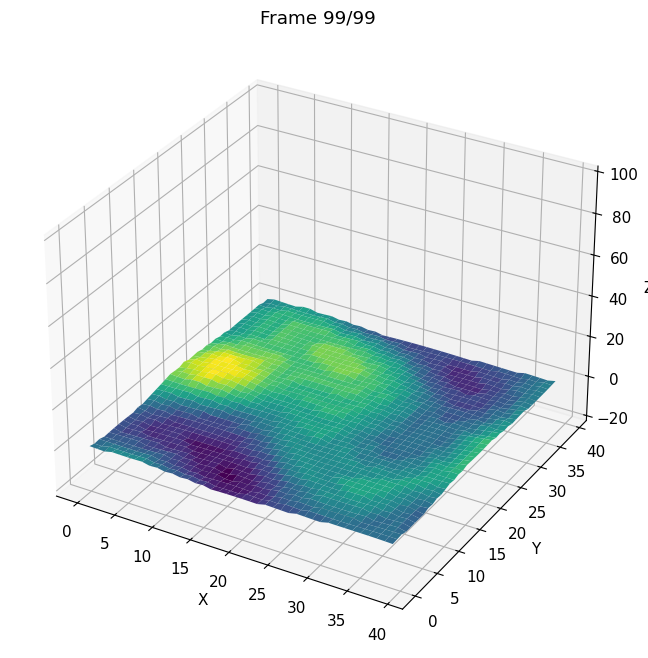

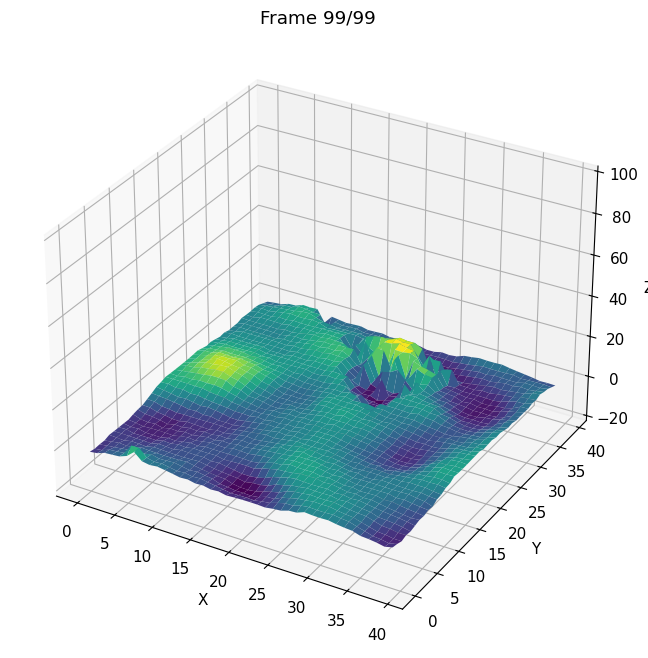

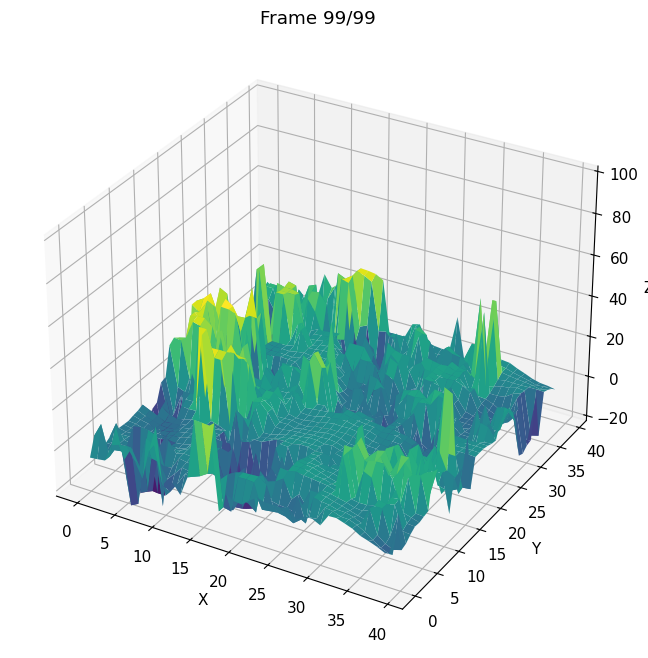

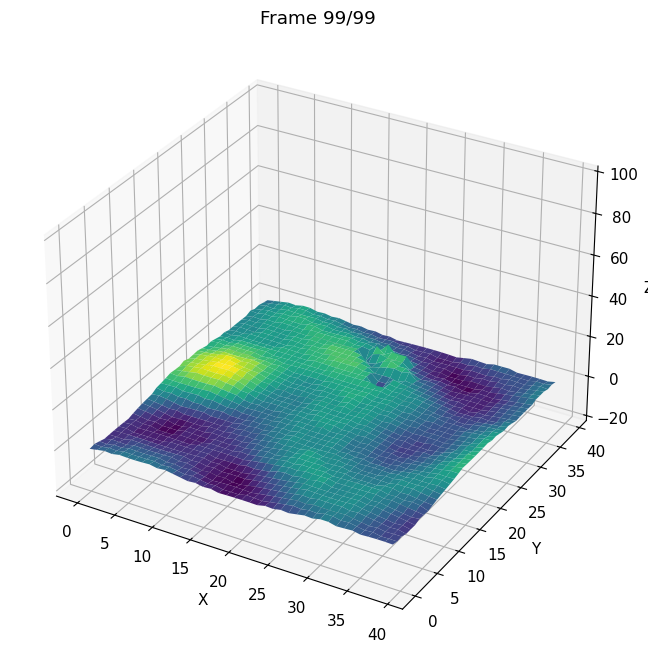

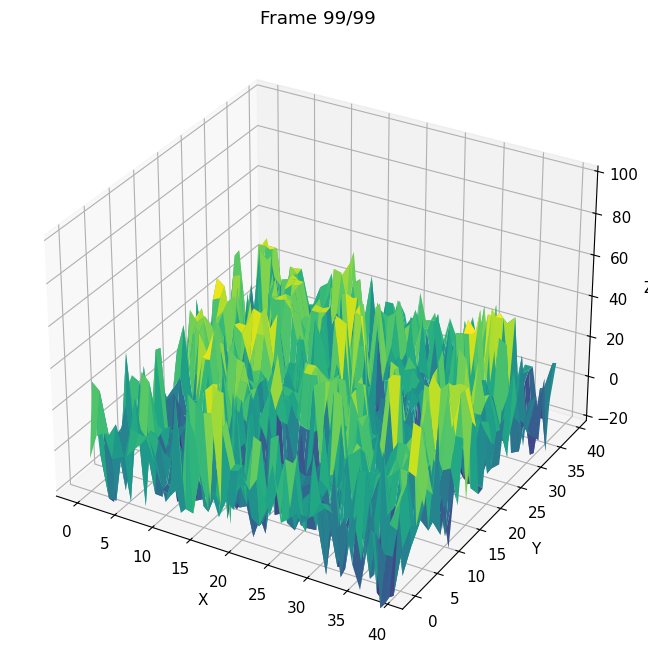

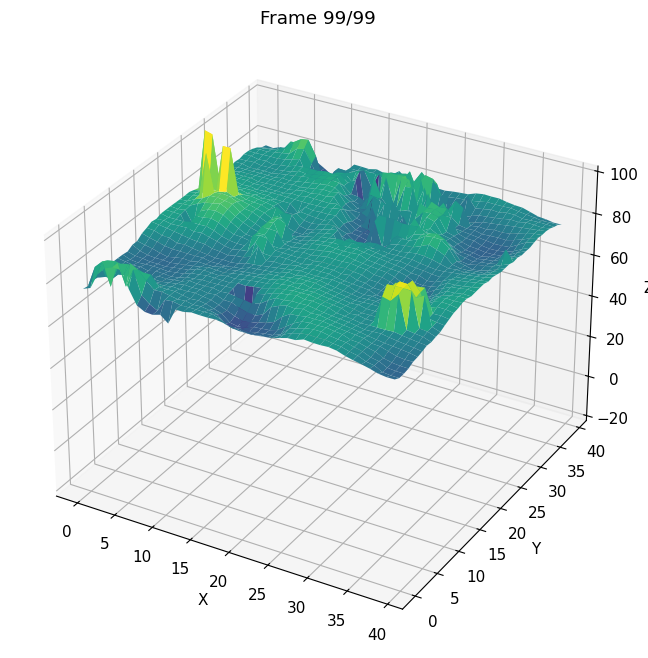

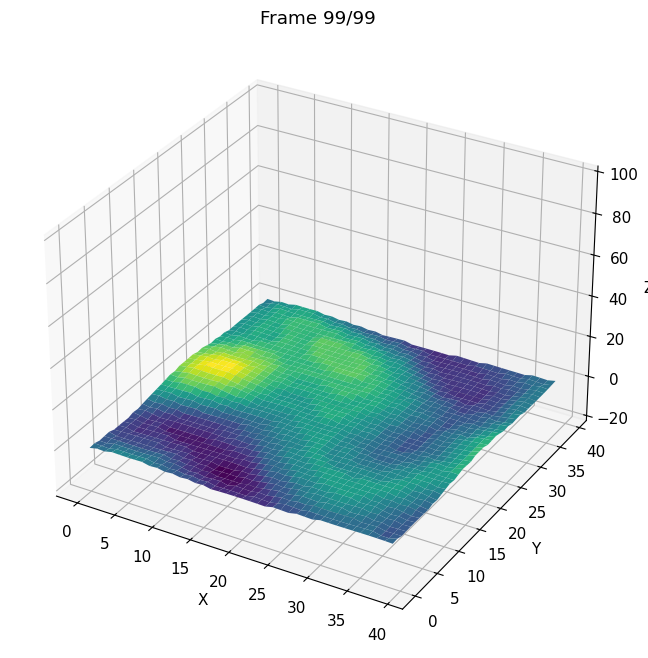

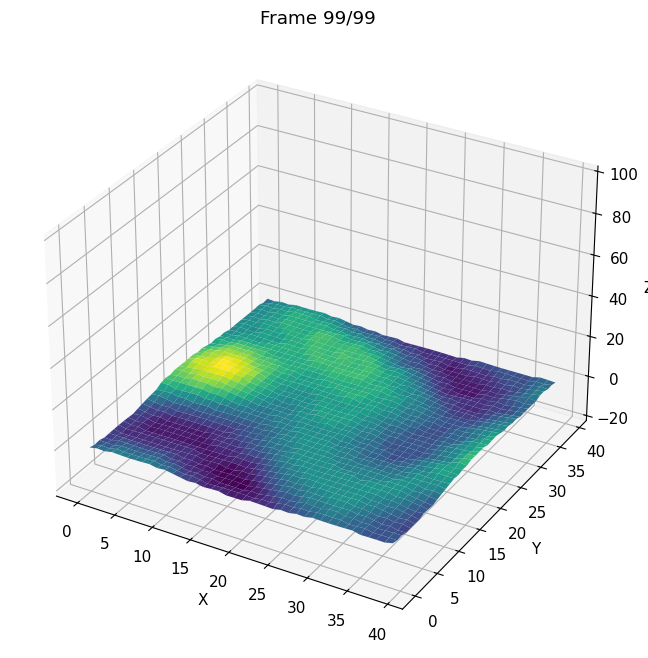

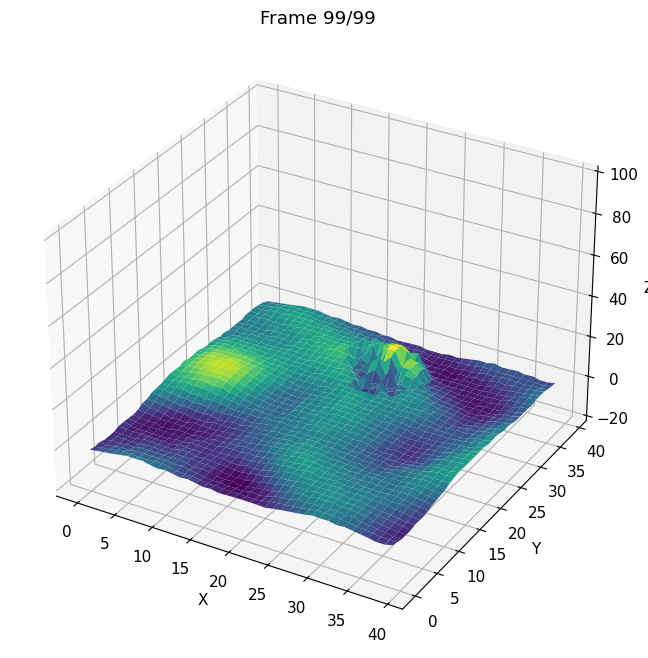

In [ ]:
%matplotlib inline
name = "su5-20-30-30-60-linear-500"
for smearing_level, surfaces in smooth_surfaces.items():
    number_of_frames = 500
    therm = 0
    file_name = "-".join(folder.split("/")[-2:])
    os.makedirs(f"../videos/surfaces/{file_name}/{name}", exist_ok=True)
    fourier_surface.animate_surface_in_3d(surfaces[therm:number_of_frames+therm], volume, output_file=f"../videos/surfaces/{file_name}/{name}/smear-{smearing_level}.mp4", fps=10)
